# 逻辑回归算法

这篇文章用python实现了逻辑回归算法，关于什么是逻辑回归算法，我在我的博客上写了一个简介，链接是：

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split
np.random.seed(250)

E:\Anaco\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X, y = make_blobs(n_samples=1000, centers=2)

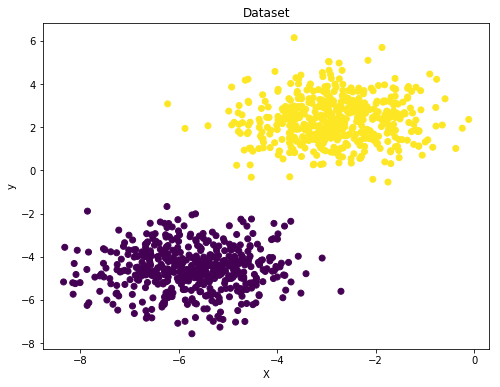

In [5]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Shape X_train: {}'.format(X_train.shape))
print('Shape y_train: {}'.format(y_train.shape))
print('Shape X_test: {}'.format(X_test.shape))
print('Shape y_test: {}'.format(y_test.shape))

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


定义逻辑回归类。实现fit()和predict()方法。

In [7]:
class LogisticRegression:
    def __init__(self):
        pass
    
    def sigmoid(self, h):
        return (1 / (1 + np.exp(-h)))
    
    def fit(self, X, y, lr=0.01, n_iters=500):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            y_pre = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            cost = (- 1 / n_samples) * np.sum(y * np.log(y_pre) + (1 - y) * (np.log(1 - y_pre)))
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pre - y))
            db = (1 / n_samples) * np.sum(y_pre - y)
            
            self.weights = self.weights - lr * dw
            self.bias = self.bias - lr * db

            costs.append(cost)
            
            if i % 100 == 0:
                print("Cost after iteration {}: {}".format(i,cost))
                
        return self.weights, self.bias, costs
    
    def predict(self, X):
        y_pre = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pre_labels = [1 if x > 0.5 else 0 for x in y_pre]

        return np.array(y_pre_labels)[:, np.newaxis]        

训练模型

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.06372046366029044
Cost after iteration 200: 0.03822830880205357
Cost after iteration 300: 0.02857981669491122
Cost after iteration 400: 0.02335677345163846
Cost after iteration 500: 0.020028930706611107
Cost after iteration 600: 0.01769887452721929


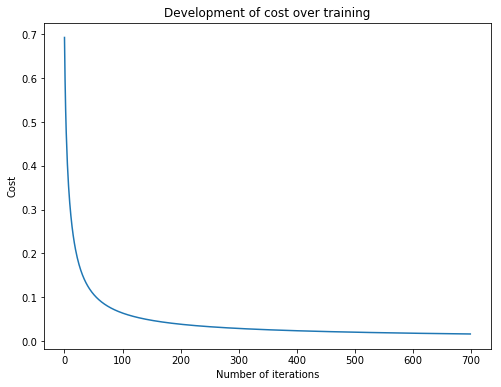

In [8]:
lr = LogisticRegression()
learning_rate = 0.03
n_iters = 700
train_w, train_b, costs = lr.fit(X_train, y_train, lr=learning_rate, n_iters=n_iters)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")


测试模型

In [9]:
y_pre = lr.predict(X_test)


In [11]:
print("test accuracy: {}".format(100 - np.mean(np.abs(y_pre - y_test))))

test accuracy: 100.0
